# **Introduction to the Perceptron in Neural Networks**

A **perceptron** is a fundamental building block in neural networks, acting as a simple model of a neuron. It was one of the earliest algorithms developed for classification tasks, where the goal is to decide if an input belongs to a certain category. 

In a perceptron, we start with multiple input values (e.g., features of data), each associated with a **weight** that represents the importance of that input. The perceptron calculates a **weighted sum** of these inputs and adds a **bias** term, which helps adjust the output along with the weights.

The perceptron then passes this sum through an **activation function** to produce an output. The activation function can be a simple step function, which outputs 1 if the sum is above a certain threshold and 0 otherwise. This setup allows the perceptron to produce a binary decision, such as yes/no or true/false.

In neural networks, a single perceptron forms the basis for more complex structures by stacking multiple perceptrons across layers. These layers of perceptrons allow networks to learn and represent more complex patterns and relationships in data.


![Description of image](perceptron-in-machine-learning2.png)

> Parts of this notebook's content were inspired by or adapted from the book *Neural Networks from Scratch in Python* by Harrison Kinsley and Daniel Kukieła. This book provides an in-depth, code-based approach to understanding and building neural networks from the ground up in Python. For more information, visit [Neural Networks from Scratch](https://nnfs.io).


In [1]:
# We start by coding a single neuron with 3 inputs
# Weights are initialised randomly, and biases are
# generally set to 0. Weights and biases get trained.

import numpy as np

inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2    # One bias per neuron (random value)

output = (inputs[0]*weights[0] +
          inputs[1]*weights[1] +
          inputs[2]*weights[2] + bias)
print(output)

2.3


![Description of image](perceptron.png)

# **Let's code a layer (multiple perceptrons)**

This is what a fully connected neural network would look like

![Description of image](nn.png)

In [2]:
# Now we present a layer of neurons (a group of neurons).
# Each layer has the same input and different weights and
# biases for each neuron.

# The following is a fully connected neural network ( every
# neuron in the current layer has connection to every neuron
# from the previous layer)
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [inputs[0]*weights1[0] +
            inputs[1]*weights1[1] +
            inputs[2]*weights1[2] +
            inputs[3]*weights1[3] + bias1,

            inputs[0] * weights2[0] +
            inputs[1] * weights2[1] +
            inputs[2] * weights2[2] +
            inputs[3] * weights2[3] + bias2,

            inputs[0]*weights3[0] +
            inputs[1]*weights3[1] +
            inputs[2]*weights3[2] +
            inputs[3]*weights3[3] + bias3
           ]
print(outputs)

[4.8, 1.21, 2.385]


In [3]:
# Using a loop
inputs = [1, 2, 3, 2.5]

weights = [ [0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    neuron_output += neuron_bias
    layer_outputs.append(neuron_output)
print(layer_outputs)

[4.8, 1.21, 2.385]


![Description of image](inputs_layer.png)
![Description of image](outputs_layer.png)

In [4]:
# A SINGLE NEURON WITH NUMPY

inputs = [1.0, 2.0, 3.0, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

outputs = np.dot(weights, inputs) + bias
print(outputs)

# 3 Neurons in a layer (USE THIS CODE FOR QUESTION 1)


inputs = [1.0, 2.0, 3.0, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2.0, 3.0, 0.5]

# Transpose weights to match dimensions for dot product
layer_outputs = np.dot(inputs, np.array(weights).T) + biases

print(layer_outputs)

4.8
[4.8   1.21  2.385]


In [5]:
# If you fit (perform a step of a training process) on one sample at a time,
# you’re highly likely to keep fitting to that individual sample, rather than
# slowly producing general tweaks to weights and biases that fit the entire dataset.

# A batch of inputs could be. This can be turned into an array since it is
# homologous. It is referred to as sample or as feature set instances or observations.

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2, 5, 1, -1],
          [-1.5, 2.7, 3.3, -0.8]]

# We can define an array with numpy as (double [[]]). This is to transform a list into
# a matrix of dimension 1 x n.

np.array([[1,2,3]])

# or

a = [1,2,3]
np.array([a])


array([[1, 2, 3]])

In [6]:
# When inputs become a batch of inputs (a matrix), we need to
# perform the matrix product.

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(inputs, np.array(weights).T) + biases

print(layer_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


## Exercise: Extending the Forward Pass

Now that we've defined a basic forward pass in a perceptron using weights, inputs, and biases, let’s explore two exercises to deepen our understanding.

### Question 1: Implementing Another Forward Pass with Randomized Weights

In this exercise, define a new set of randomized weights for each neuron in the layer and perform another forward pass with the same outputs we obtained previously. This will demonstrate how different weight configurations affect the output values.

- **Instructions**:
  1. Use `numpy` to generate a new set of random weights for the neurons in the layer. Call it weights2
  2. Perform a forward pass with weights and then with weights2.
  3. Observe how the outputs change with different weight values.
  4. Can you change your code so that we only obtain one output?


In [7]:
# Define the input vector
inputs = np.array([1.0, 2.0, 3.0, 4.0])  # 4 input features

# Generate two sets of random weights (for multiple neurons in a layer)
weights1 = np.random.randn(3, 4)  # 3 neurons, 4 inputs each
weights2 = np.random.randn(3, 4)  # Another set of weights
biases = np.random.randn(3)  # 3 bias values, one for each neuron

# Perform forward passes using both sets of weights
output1 = np.dot(weights1, inputs) + biases  # First forward pass
output2 = np.dot(weights2, inputs) + biases  # Second forward pass

# Modify the code to get only one output (single neuron case)
weights_single = np.random.randn(4)  # 4 input weights for a single neuron
bias_single = np.random.randn()  # Single bias
single_output = np.dot(weights_single, inputs) + bias_single  # Single neuron forward pass

# Print results
print("First forward pass outputs:", output1)
print("Second forward pass outputs:", output2)
print("Single neuron output:", single_output)


First forward pass outputs: [ 1.56652717 -0.57193596  0.81767752]
Second forward pass outputs: [-0.01140804 -8.71792245  6.74639365]
Single neuron output: 3.605372101478362


### Question 2: Using the ReLU Activation Function

For this exercise, let's apply the **ReLU activation function** to our forward pass. ReLU, short for **Rectified Linear Unit**, is one of the most commonly used activation functions in neural networks, especially in hidden layers.

**What is ReLU?**

The ReLU function introduces non-linearity by setting all negative values to zero while leaving positive values unchanged. Mathematically, ReLU can be defined as:


$$\text{ReLU}(x) = \max(0, x)$$


This function is simple yet effective, allowing the network to model complex relationships in data. Its primary benefits include efficient computation and preventing some of the issues associated with other activation functions, like the vanishing gradient problem.

- **Instructions**:
  1. Apply the ReLU function to the outputs of your forward pass.
  2. Implement the ReLU function in Python using `numpy`.
  3. Use ReLU on the outputs obtained in **Question 1** to see how it affects the final values.
  

In [8]:
# Define the input vector
inputs = np.array([1.0, 2.0, 3.0, 4.0])  # 4 input features

# Generate random weights and biases for a perceptron layer
weights = np.random.randn(3, 4)  # 3 neurons, 4 inputs each
biases = np.random.randn(3)  # Bias for each neuron

# Perform the forward pass
layer_outputs = np.dot(weights, inputs) + biases  # Compute weighted sum

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Apply ReLU to the layer's output
relu_outputs = relu(layer_outputs)

# Print results
print("Raw outputs before ReLU:", layer_outputs)
print("Outputs after applying ReLU:", relu_outputs)


Raw outputs before ReLU: [ 0.8157347  12.05493394 -1.3679488 ]
Outputs after applying ReLU: [ 0.8157347  12.05493394  0.        ]


After completing these exercises, consider how ReLU changes the distribution of output values and why it might be beneficial in deep learning networks.

ReLU transforms the output distribution by setting negative values to zero, creating sparsity and shifting the distribution to be non-symmetric. This sparsity improves computational efficiency and helps prevent overfitting. Unlike sigmoid or tanh, ReLU preserves gradients for positive values, mitigating the vanishing gradient problem and enabling effective backpropagation in deep networks. Its linear behaviour for positive inputs allows efficient learning without saturation. Additionally, ReLU’s simplicity speeds up training by avoiding expensive exponential calculations, while its natural regularisation effect reduces dependency on specific neurons, making it the preferred activation function in deep learning.

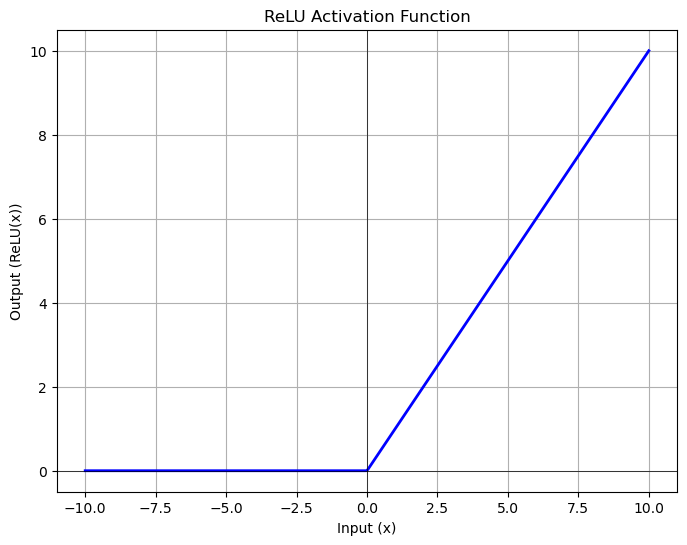

In [9]:
# Visualization of ReLU
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values from -10 to 10
x_values = np.linspace(-10, 10, 400)
y_values = relu(x_values)

# Plot ReLU
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color="blue", linewidth=2)
plt.title("ReLU Activation Function")
plt.xlabel("Input (x)")
plt.ylabel("Output (ReLU(x))")
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.show()


## **Extra Material**

In [10]:
# NN are deep when they have 2 or more hidden layers.

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


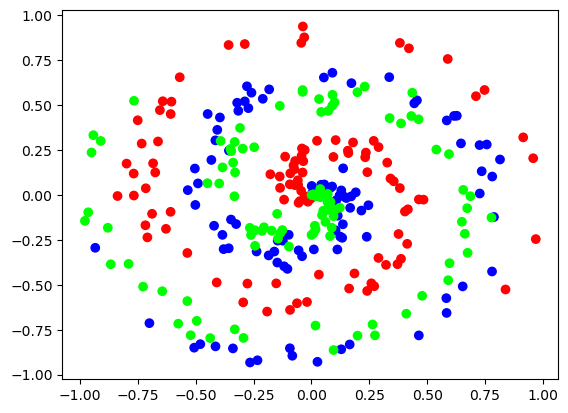

In [11]:
# nnfs is a packcage that contains functions we can use
# to create data
import nnfs # !pip install nnfs
from nnfs.datasets import spiral_data

nnfs.init()
X, y = spiral_data(samples = 100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'brg')
plt.show()


In [12]:
# The “classification” for that dot has to do with which spiral it is
# a part of, depicted by blue, green, or red color in the previous image.
# These colors would then be assigned a class number for the model to fit to,
# like 0, 1, and 2.

# DENSE LAYER CLASS

# So far we have dealt with dense/fully-conected (fc) layers.

# When we pass data through a model from beginning to end, this is
# called a forward pass

# Sometimes do not use 0 on bias to avoid dead neurons.

# arrays.np.random.randn produces a Gaussian distribution
# with a mean of 0 and a variance of 1. It takes dimension
# sizes as parameters and creates the output array with this shape.

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons)) # random weights and 0 bias

    # Forwards pass
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# Create dataset
X, y = spiral_data(samples = 100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2,3)

# Perform a forward pass of training data through this layer
dense1.forward(X)
print(dense1.output[:5])


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]
